#### **NAME: Jackline Mboya**
#### **ADM No: 193670**

**Week 6 Assignment**

#### **Unit Code: DSA 8302**
#### **Unit Name: Computational Techniques in Data Science**

## Question one: Graphical Method (2 variables)

### **Question**:
A small workshop makes two types of furniture: chairs and tables. Each chair requires 2 hours of carpentry and 1 hour of painting. Each table requires 1 hour of carpentry and 1 hour of painting. The workshop has 6 hours of carpentry time and 4 hours of painting time available each day. Each chair gives a profit of `$30`, and each table gives a profit of `$20`.

Task:
- Formulate the problem as a linear program.
- Plot the feasible region and determine the optimal number of chairs and tables to maximize profit using a graphical method.

### **Solution**

###  Linear Programming Formulation
**Decision Variables**:

Let:

x: number of chairs produced per day

y: number of tables produced per day

**Objective Function (to Maximize Profit)**:

Maximize z = 30x + 20y

**Constraints**:

1. **Carpentry Time**:  2x + y ≤ 6 (hours)
2. **Painting Time**: x + y ≤ 4 (hours)
3. **Non-negativity constraint**: x ≥ 0, y ≥ 0

#### **Full Linear formulation**
Maximize: Z=30x+20y

Subject to:

2x + y ≤ 6

x + y ≤ 4

x ≥ 0, y ≥ 0



#### Plot the feasible region and obtain the optimal number of chairs and tables

In [1]:
import numpy as np
import matplotlib.pyplot as plt

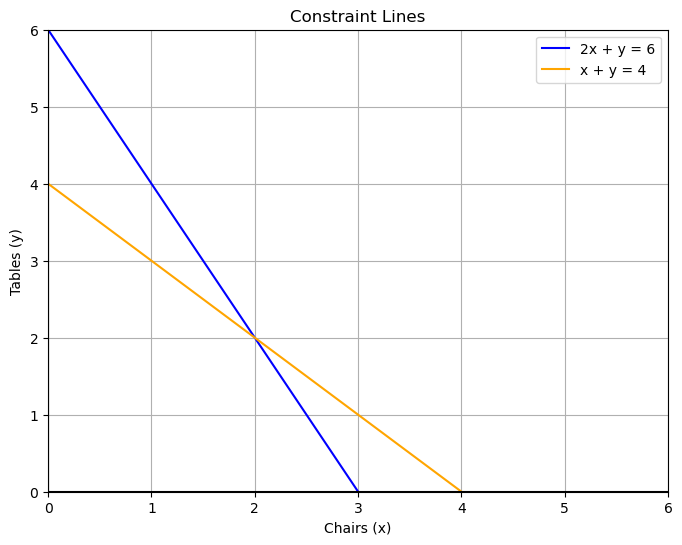

In [2]:
# Step 1: Define x values and constraint lines
x = np.linspace(0, 10, 400)
y1 = 6 - 2*x       # 2x + y <= 6 (carpentry)
y2 = 4 - x         # x + y <= 4 (painting)

# Step 2: Plot the constraints
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label='2x + y = 6', color='blue')
plt.plot(x, y2, label='x + y = 4', color='orange')
plt.axhline(0, color='black')  # x-axis
plt.axvline(0, color='black')  # y-axis

# Limit the view to first quadrant
plt.xlim(0, 6)
plt.ylim(0, 6)

plt.xlabel("Chairs (x)")
plt.ylabel("Tables (y)")
plt.title("Constraint Lines")
plt.grid(True)
plt.legend()
plt.show()

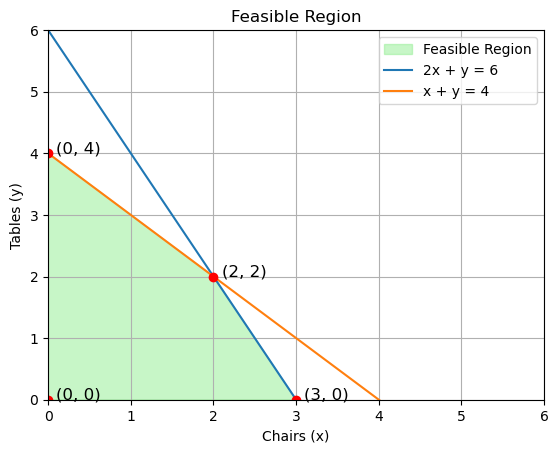

In [3]:
from matplotlib.patches import Polygon

 # Identify the corner points
points = np.array([
    [0, 0],    # Origin
    [0, 4],    # y-intercept of x + y = 4
    [2, 2],    # intersection of both constraints
    [3, 0]     # x-intercept of 2x + y = 6
])

# Draw and fill the feasible region
polygon = Polygon(points, closed=True, color='lightgreen', alpha=0.5, label='Feasible Region')
plt.gca().add_patch(polygon)

# Plot points and the feasible region
plt.plot(x, y1, label='2x + y = 6')
plt.plot(x, y2, label='x + y = 4')
for (xi, yi) in points:
    plt.plot(xi, yi, 'ro')
    plt.text(xi + 0.1, yi, f'({xi}, {yi})', fontsize=12)

plt.xlabel("Chairs (x)")
plt.ylabel("Tables (y)")
plt.title("Feasible Region")
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.grid(True)
plt.legend()
plt.show()

#### Finding the optimal solution of chairs and tables

In [4]:
# Objective function coefficients
def profit(x, y):
    return 30*x + 20*y

# Evaluate profit at each vertex
profits = []
for (xi, yi) in points:
    z = profit(xi, yi)
    profits.append(z)
    print(f"Profit at ({xi}, {yi}) = ${z:.2f}")

# Find the maximum profit and corresponding point
max_index = np.argmax(profits)
optimal_point = points[max_index]
optimal_profit = profits[max_index]

print("\nOptimal Solution:")
print(f"Produce {int(optimal_point[0])} chairs and {int(optimal_point[1])} tables")
print(f"Maximum Profit = ${optimal_profit:.2f}")

Profit at (0, 0) = $0.00
Profit at (0, 4) = $80.00
Profit at (2, 2) = $100.00
Profit at (3, 0) = $90.00

Optimal Solution:
Produce 2 chairs and 2 tables
Maximum Profit = $100.00


#### **Interpretation**

- The optimal solution is to produce 2 chairs and 2 tables.

- This gives a maximum profit of $100.

- The solution lies at the intersection point (2, 2) of the constraints; x and y.

- All resource limits (carpentry and painting) are fully utilized at this point.

## Question Two. Simplex Algorithm (via `scipy.optimize.linprog`)

### **Question**:
A factory produces 3 products: A, B, and C.  
Each requires machine hours on 2 machines: M1 and M2.

| Product | Profit | M1 Hours | M2 Hours |
|---------|--------|----------|----------|
| A       | `$40`    | 2        | 1        |
| B       | `$30`    | 1        | 2        |
| C       | `$20`    | 1        | 1        |

- M1 is available for 100 hours/week.  
- M2 is available for 80 hours/week.

**Task:**
- Formulate and solve using the **Simplex algorithm** via `scipy.optimize.linprog`.  
- Determine how many units of A, B, and C to produce to **maximize profit**.

### **Solution**

Formulate and solve using the **Simplex algorithm** via `scipy.optimize.linprog`.

Let:

x1: units of Product A

x2: units of Product B

x3: units of Product C

**Objective Function (maximize profit)**:

Maximize z = 40x1 + 30x2 + 20x3

**Subject to Constraints**:

**M1**: 2x1 + x2 + x3 ≤ 100

**M2**: x1 + x2 + x3 ≤ 80

**Non-negativity**: x1, x2, x3 ≥ 0



#### Solve using simplex algorithm

In [5]:
from scipy.optimize import linprog

# Coefficients of the objective function (negated for maximization)
c = [-40, -30, -20]  # Maximize Z = 40x1 + 30x2 + 20x3

# Coefficients of inequality constraints (A_ub * x <= b_ub)
A = [
    [2, 1, 1],   # M1 constraint
    [1, 2, 1]    # M2 constraint
]
b = [100, 80]

# Variable bounds: x1, x2, x3 >= 0
x_bounds = (0, None)

# Solve using linprog
res = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds]*3, method='highs')

# Display results
if res.success:
    print("Optimal solution found:")
    print(f"Product A (x1): {res.x[0]:.2f} units")
    print(f"Product B (x2): {res.x[1]:.2f} units")
    print(f"Product C (x3): {res.x[2]:.2f} units")
    print(f"\n Maximum profit: ${-res.fun:.2f}")
else:
    print("No optimal solution found.")


Optimal solution found:
Product A (x1): 40.00 units
Product B (x2): 20.00 units
Product C (x3): 0.00 units

 Maximum profit: $2200.00


#### How many units of A, B, and C are needed to produce to maximize profit?

In [6]:
from scipy.optimize import linprog

# Coefficients of the objective function (negative because linprog does minimization)
c = [-40, -30, -20]  # Maximize Z = 40x1 + 30x2 + 20x3

# Coefficients for inequality constraints (A_ub * x <= b_ub)
A = [
    [2, 1, 1],  # Machine M1 constraint
    [1, 2, 1]   # Machine M2 constraint
]
b = [100, 80]  # Available hours for M1 and M2

# Bounds for each variable: x1, x2, x3 >= 0
bounds = [(0, None), (0, None), (0, None)]

# Solve using the 'highs' method (modern simplex-based solver)
result = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')

# Extract the results
result_status = result.success
units = result.x
max_profit = -result.fun if result.success else None

print(units)

[40. 20.  0.]


### Interpretation
To maximize profit, the factory should produce:

- 40 units of Product A

- 20 units of Product B

- 0 units of Product C

This gives a maximum profit of $2200.

Both machines (M1 and M2) are used to full capacity:

- **M1: 100 hours used**:

2(40) + 1(20) + 1(0) = 80 + 20 = 100 hours (fully used)

- **M2: 80 hours used**:

1(40) + 2(20) + 1(0) = 40 + 40 = 80 hours (fully used)

## Question Three. Transportation Method – Northwest Corner Rule (manual or pandas/numpy)

### **Question**:
A company has 3 factories (**S1**, **S2**, **S3**) and 4 distribution centers (**D1**, **D2**, **D3**, **D4**).

### Supplies:
- S1: 30 units  
- S2: 40 units  
- S3: 20 units

### Demands:
- D1: 20 units  
- D2: 30 units  
- D3: 25 units  
- D4: 15 units

### Cost Matrix:

|     | D1 | D2 | D3 | D4 |
|-----|----|----|----|----|
| S1  |  8 |  6 | 10 |  9 |
| S2  |  9 |  7 |  4 |  2 |
| S3  |  3 |  4 |  2 |  5 |

### Task:
- Use the **Northwest Corner Method** to construct an initial feasible solution manually or via a custom function in Python.  
- Display the allocation matrix and compute the **total transportation cost**.


### **Solution**

#### **Define the Problem**

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Supplies (factories)
supply = [30, 40, 20]

# Demands (distribution centers)
demand = [20, 30, 25, 15]

# Cost matrix (rows: sources, columns: destinations)
cost = np.array([
    [8, 6, 10, 9],
    [9, 7, 4, 2],
    [3, 4, 2, 5]
])


#### **Apply the Northwest Corner Method**

In [8]:
# Initialize allocation matrix
allocation = np.zeros_like(cost)

# Copy supply and demand lists
supply_copy = supply.copy()
demand_copy = demand.copy()

# Start from top-left and allocate
i = 0
j = 0

while i < len(supply_copy) and j < len(demand_copy):
    alloc = min(supply_copy[i], demand_copy[j])
    allocation[i][j] = alloc
    supply_copy[i] -= alloc
    demand_copy[j] -= alloc

    # Move to next row or column
    if supply_copy[i] == 0:
        i += 1
    elif demand_copy[j] == 0:
        j += 1

In [10]:
import pandas as pd
# Display the constructed feasible solution
df_correct_feasible_solution = pd.DataFrame(allocation, columns=["D1", "D2", "D3", "D4"], index=["S1", "S2", "S3"])
print("Initial Feasible Solution:")
print(df_correct_feasible_solution)

Initial Feasible Solution:
    D1  D2  D3  D4
S1  20  10   0   0
S2   0  20  20   0
S3   0   0   5  15


**Display the allocation matrix and compute the total transportation cost.**

In [11]:
# Display the allocation matrix
df_result = pd.DataFrame(allocation, columns=["D1", "D2", "D3", "D4"], index=["S1", "S2", "S3"])

print(df_result)

    D1  D2  D3  D4
S1  20  10   0   0
S2   0  20  20   0
S3   0   0   5  15


In [12]:
# Compute the total transportation cost
total_cost = np.sum(allocation * cost)

print(f"\nTotal Transportation Cost: ${total_cost}")


Total Transportation Cost: $525


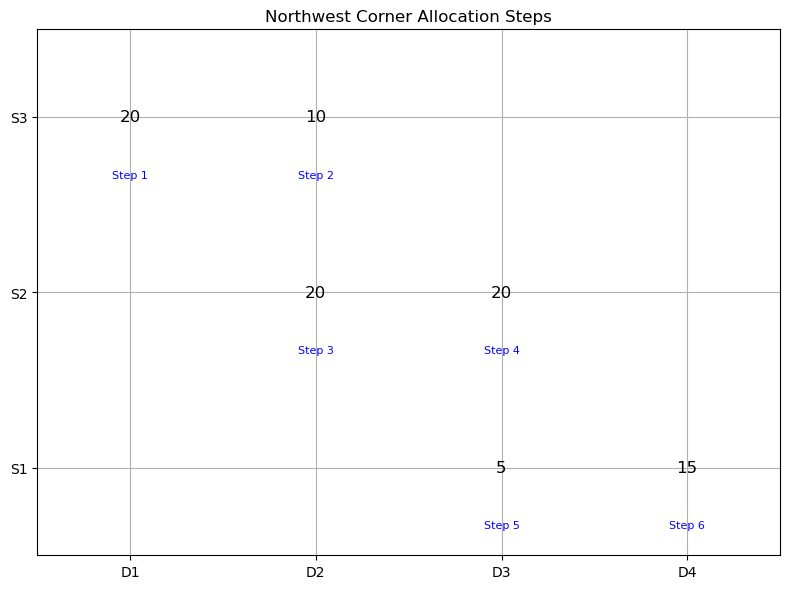

In [13]:
# Run allocation to capture each step
steps = []
supply = [30, 40, 20]
demand = [20, 30, 25, 15]
supply_copy = supply.copy()
demand_copy = demand.copy()
alloc_matrix = np.zeros((3, 4), dtype=int)

i = j = 0
while i < len(supply_copy) and j < len(demand_copy):
    alloc = min(supply_copy[i], demand_copy[j])
    alloc_matrix[i][j] = alloc
    steps.append((i, j, alloc))
    supply_copy[i] -= alloc
    demand_copy[j] -= alloc
    if supply_copy[i] == 0:
        i += 1
    elif demand_copy[j] == 0:
        j += 1

# Plot grid with annotations for each step
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(0, 4)
ax.set_ylim(0, 3)
ax.set_xticks(np.arange(4) + 0.5)
ax.set_yticks(np.arange(3) + 0.5)
ax.set_xticklabels(['D1', 'D2', 'D3', 'D4'])
ax.set_yticklabels(['S1', 'S2', 'S3'])
ax.grid(True)

# Draw allocation and steps
for i in range(3):
    for j in range(4):
        if alloc_matrix[i][j] > 0:
            ax.text(j + 0.5, 2.5 - i, f"{alloc_matrix[i][j]}", ha='center', va='center', fontsize=12)
for idx, (i, j, val) in enumerate(steps):
    ax.text(j + 0.5, 2.5 - i - 0.3, f"Step {idx+1}", ha='center', va='top', fontsize=8, color='blue')

ax.set_title("Northwest Corner Allocation Steps")
plt.tight_layout()
plt.show()


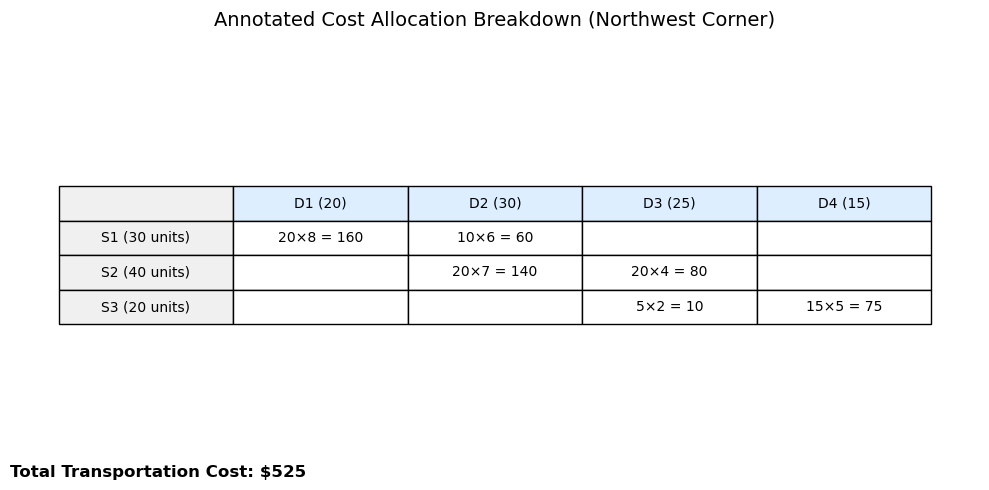

In [14]:
# Visual the cost breakdown table
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('off')

# Define data for annotated matrix
labels = [
    ["20×8 = 160", "10×6 = 60", "", ""],
    ["", "20×7 = 140", "20×4 = 80", ""],
    ["", "", "5×2 = 10", "15×5 = 75"]
]

# Define supply and demand headers
row_headers = ["S1 (30 units)", "S2 (40 units)", "S3 (20 units)"]
col_headers = ["D1 (20)", "D2 (30)", "D3 (25)", "D4 (15)"]

# Create the table
table_data = [["" for _ in range(5)] for _ in range(4)]

# Fill column headers
for j in range(4):
    table_data[0][j + 1] = col_headers[j]

# Fill row headers and data
for i in range(3):
    table_data[i + 1][0] = row_headers[i]
    for j in range(4):
        table_data[i + 1][j + 1] = labels[i][j]

# Create the table
the_table = ax.table(cellText=table_data,
                     colWidths=[0.15] * 5,
                     loc='center',
                     cellLoc='center')

the_table.scale(1.2, 1.8)
the_table.auto_set_font_size(False)
the_table.set_fontsize(10)

# Highlight header row and column
for j in range(5):
    the_table[(0, j)].set_facecolor("#dceeff")
for i in range(4):
    the_table[(i, 0)].set_facecolor("#f0f0f0")

# Add total cost annotation below the table
plt.text(0, -0, "Total Transportation Cost: $525", fontsize=12, weight='bold')

plt.title("Annotated Cost Allocation Breakdown (Northwest Corner)", fontsize=14)
plt.tight_layout()
plt.show()


### **Interpretation**

- The allocation matrix shows how many units each factory (S1, S2, S3) should send to each distribution center (D1 to D4) to meet supply and demand constraints.
- The Northwest Corner Method provided a feasible starting solution by beginning allocations from the "top-left" (northwest) cell and progressing through the matrix.
- The Northwest Corner Method provides a feasible shipment plan from factories to distribution centers.
- The Northwest Corner Method starts at the top-left cell (S1 → D1) and allocates as much as possible based on supply and demand.
- It proceeds rightward or downward, updating remaining supply and demand until all are satisfied.
- Total transportation cost = $525
- This solution meets all supply and demand requirements but is not guaranteed to be optimal.